<a href="https://colab.research.google.com/github/gkim0112/2012210109/blob/master/05_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_%ED%85%9C%ED%94%8C%EB%A6%BF_(%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D_%EA%B9%80%EC%A7%84%EC%9A%A9_221111).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 데이터 분석 프로젝트 ###

* 이번 예제는 머신러닝의 주요 프로세스를 상세하게 설명합니다.
* 미션0: 파일 제목에 작성자의 이름과 작성일을 입력하세요.
* 미션1: 기존 머신러닝 분석 예시 코드를 조합하여 코드셀에 적절한 코드를 입력하세요.
* 미션2: 코드셀 위에 텍스트셀을 생성하고 헤드라인 속성을 적용하여 코드의 제목을 입력하세요.
* 미션3: 완성된 코드를 ipynb 파일로 다운로드한 뒤, 강연자에게 줌 채팅 또는 이메일로 전송하세요. (강연자: 동준상 naebon1@gmail.com)

## 라이브러리 임포트
* https://numpy.org/
* https://matplotlib.org/
* https://pandas.pydata.org/
* https://scikit-learn.org/stable/
* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [84]:
### 라이브러리 임포트 ###
# 기본 수 처리 (배열 생성 등)
import pandas as pd ### as pd
import numpy as np ### as np
from sklearn.model_selection import train_test_split ### import train_test_split
from sklearn.impute import SimpleImputer ### import SimpleImputer
import matplotlib.pyplot as plt ### as plt

# 전처리
from sklearn.preprocessing import MinMaxScaler ### import MinMaxScaler #정규화
from sklearn.preprocessing import StandardScaler ### #표준화
from sklearn.preprocessing import LabelEncoder ### import LabelEncoder #binary values를 1,0으로 변환
from sklearn.preprocessing import OneHotEncoder ### #multi variate values를 1과 0의 조합으로 변환

# 머신러닝 모델(회귀분석)
from sklearn.linear_model import LinearRegression ### import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR ###
from sklearn.tree import DecisionTreeRegressor ### import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor ### import RandomForestRegressor

from sklearn.metrics import r2_score ### import r2_score

### 데이터 로딩 / 개요 파악


In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [86]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [87]:
### 데이터 로딩 / 개요 파악 ###
# data = pd.read_csv('./김진용_churn.csv')
data = pd.read_csv('/content/drive/MyDrive/김진용_churn.csv')

컬럼별 유니크값 수

In [88]:
len(data)
unique_val = {key : len(set(data[key])) for key in data.keys()}
unique_val        

{'State': 51,
 'Account Length': 200,
 'Area Code': 33,
 'Phone': 4999,
 "Int'l Plan": 2,
 'VMail Plan': 2,
 'VMail Message': 14,
 'Day Mins': 5000,
 'Day Calls': 11,
 'Day Charge': 5000,
 'Eve Mins': 5000,
 'Eve Calls': 15,
 'Eve Charge': 5000,
 'Night Mins': 5000,
 'Night Calls': 12,
 'Night Charge': 5000,
 'Intl Mins': 5000,
 'Intl Calls': 13,
 'Intl Charge': 5000,
 'CustServ Calls': 14,
 'Churn?': 2}

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           5000 non-null   object 
 1   Account Length  5000 non-null   int64  
 2   Area Code       5000 non-null   int64  
 3   Phone           5000 non-null   object 
 4   Int'l Plan      5000 non-null   object 
 5   VMail Plan      5000 non-null   object 
 6   VMail Message   5000 non-null   int64  
 7   Day Mins        5000 non-null   float64
 8   Day Calls       5000 non-null   int64  
 9   Day Charge      5000 non-null   float64
 10  Eve Mins        5000 non-null   float64
 11  Eve Calls       5000 non-null   int64  
 12  Eve Charge      5000 non-null   float64
 13  Night Mins      5000 non-null   float64
 14  Night Calls     5000 non-null   int64  
 15  Night Charge    5000 non-null   float64
 16  Intl Mins       5000 non-null   float64
 17  Intl Calls      5000 non-null   i

In [90]:
### 데이터 로딩 / 개요 파악 ###
data.head(5)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,PA,163,806,403-2562,no,yes,300,8.162204,3,7.579174,...,4,6.508639,4.065759,100,5.111624,4.928160,6,5.673203,3,True.
1,SC,15,836,158-8416,yes,no,0,10.018993,4,4.226289,...,0,9.972592,7.141040,200,6.436188,3.221748,6,2.559749,8,False.
2,MO,131,777,896-6253,no,yes,300,4.708490,3,4.768160,...,3,4.566715,5.363235,100,5.142451,7.139023,2,6.254157,4,False.
3,WY,75,878,817-5729,yes,yes,700,1.268734,3,2.567642,...,5,2.333624,3.773586,450,3.814413,2.245779,6,1.080692,6,False.
4,WY,146,878,450-4942,yes,no,0,2.696177,3,5.908916,...,3,3.670408,3.751673,250,2.796812,6.905545,4,7.134343,6,True.


In [91]:
data.describe()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,101.675800,773.791400,226.680000,5.518757,3.50460,5.018902,5.026199,3.140400,5.017557,4.000917,224.790000,5.023490,5.025876,5.475400,4.328242,5.525800
std,57.596762,63.470888,273.998527,3.433485,1.68812,2.195759,2.135487,2.525621,2.127857,1.631001,97.302875,1.748900,1.019302,1.877045,2.440311,2.041217
min,1.000000,657.000000,0.000000,0.000215,0.00000,0.004777,0.004659,0.000000,0.013573,0.008468,0.000000,0.054863,1.648514,0.000000,0.000769,0.000000
25%,52.000000,736.000000,0.000000,2.682384,2.00000,3.470151,3.588466,1.000000,3.529613,2.921998,150.000000,3.873157,4.349726,4.000000,2.468225,4.000000
50%,102.000000,778.000000,0.000000,5.336245,3.00000,4.988291,5.145656,3.000000,5.006860,3.962089,200.000000,5.169154,5.034905,5.000000,4.214058,6.000000
75%,151.000000,806.000000,400.000000,7.936151,5.00000,6.559750,6.552962,5.000000,6.491725,5.100128,300.000000,6.272015,5.716386,7.000000,5.960654,7.000000
max,200.000000,878.000000,1300.000000,16.897529,10.00000,12.731936,13.622097,14.000000,12.352871,10.183378,550.000000,10.407778,8.405644,12.000000,14.212261,13.000000


21 Index(['State', 'Account Length', 'Area Code', 'Phone', 'Int'l Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn?'],
      dtype='object')


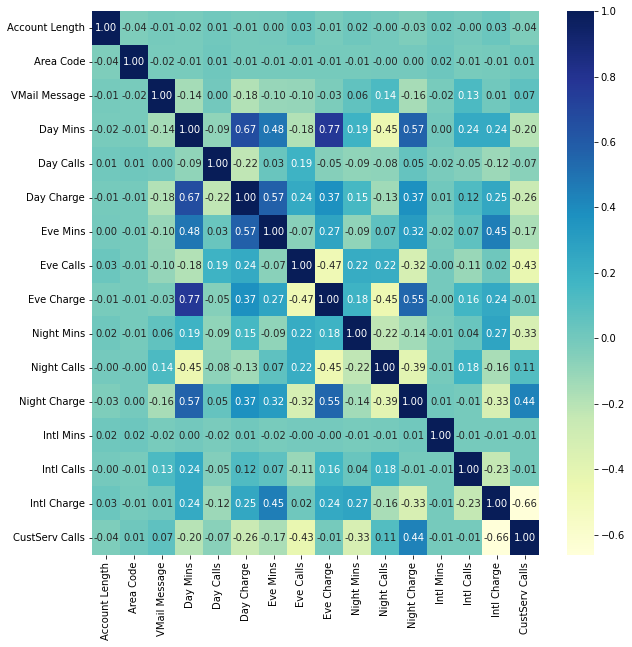

In [92]:
print(len(data.keys()), data.keys())
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True, fmt=".2f", cmap="YlGnBu")

시간대 / 지역 사용량에 따른 청구 금액 상관관계

In [94]:
corr_df1 = data[['Day Mins', 'Day Calls', 'Day Charge']].corr()
corr_df2 = data[['Eve Mins', 'Eve Calls', 'Eve Charge']].corr()
corr_df3 = data[['Night Mins', 'Night Calls', 'Night Charge']].corr()
corr_df4 = data[['Intl Mins', 'Intl Calls', 'Intl Charge']].corr()
print(corr_df1)
print()
print(corr_df2)
print()
print(corr_df3)
print()
print(corr_df4)

            Day Mins  Day Calls  Day Charge
Day Mins    1.000000  -0.087598    0.667941
Day Calls  -0.087598   1.000000   -0.222556
Day Charge  0.667941  -0.222556    1.000000

            Eve Mins  Eve Calls  Eve Charge
Eve Mins    1.000000  -0.067123    0.269980
Eve Calls  -0.067123   1.000000   -0.467814
Eve Charge  0.269980  -0.467814    1.000000

              Night Mins  Night Calls  Night Charge
Night Mins      1.000000    -0.223023     -0.140482
Night Calls    -0.223023     1.000000     -0.390333
Night Charge   -0.140482    -0.390333      1.000000

             Intl Mins  Intl Calls  Intl Charge
Intl Mins     1.000000   -0.007220    -0.010907
Intl Calls   -0.007220    1.000000    -0.233809
Intl Charge  -0.010907   -0.233809     1.000000


VMail 서비스 이용자 중 VMail Message 기록 없는 인원 -> 추가 컬럼 생성

In [95]:
cnt = 0
chk = set()
for i in range(len(data)):
    if (data['VMail Plan'][i] == 'yes' and data['VMail Message'][i] == 0) \
        or (data['VMail Plan'][i] == 'no' and data['VMail Message'][i] != 0):
        cnt += 1
        chk.add((data['VMail Plan'][i], data['VMail Message'][i]))
print(cnt)
print(chk)

61
{('yes', 0)}


## 데이터 전처리

In [96]:
### 누락값 여부 및 개수 확인 ###
count_nan = data.isnull().sum() # the number of missing values for every column
print(count_nan[count_nan > 0])

Series([], dtype: int64)


모든 column non-null이므로 누락값 처리 필요 X

#### 누락값 제거 전략 4: fillna()
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html



In [97]:
### 누락값 처리 위해 fillna() 함수 사용 ###

## 카테고리형 데이터의 숫자형 데이터 변환

* 카테고리형 데이터: Nominal, Ordinal
* 숫자형 데이터: Interval, Ratio

* Label Encoding
* One Hot Encoding

### sklearn 변환 함수
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html

## indexing & selecting with loc, iloc
* https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html
* .loc is primarily label based, but may also be used with a boolean array
* .iloc is primarily integer position based (from 0 to length-1 of the axis)

#### LabelEncoder 구현
* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.fit_transform

In [104]:
churn = data.iloc[:, 20:21].values    #  "Int'l Plan": 2

## le for churn
#LabelEncoder()
#DataFrame()
le = LabelEncoder()
churn[:,0] = le.fit_transform(churn[:,0]) #데이터 타입 변경
churn = pd.DataFrame(churn) #판다스 데이터프레임 타입으로 재변경
churn.columns = ["Churn?"]
le_churn_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Sklearn label encoder results for sex:")  
print(le_churn_mapping)

Sklearn label encoder results for sex:
{'False.': 0, 'True.': 1}


In [105]:
### 두 가지 선택안의 텍스트 데이터를 숫자형 데이터로 변환 (라벨인코더 사용) 
intl_plan = data.iloc[:, 4:5].values    #  "Int'l Plan": 2
vmail_plan = data.iloc[:, 5:6].values   #  'VMail Plan': 2

In [106]:
## le for intl_plan
#LabelEncoder()
#DataFrame()
le = LabelEncoder()
intl_plan[:,0] = le.fit_transform(intl_plan[:,0]) #데이터 타입 변경
intl_plan = pd.DataFrame(intl_plan) #판다스 데이터프레임 타입으로 재변경
intl_plan.columns = ["Int'l Plan"]
le_intl_plan_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Sklearn label encoder results for sex:")  
print(le_intl_plan_mapping)

Sklearn label encoder results for sex:
{'no': 0, 'yes': 1}


In [107]:
## le for vmail_plan
le = LabelEncoder()
vmail_plan[:,0] = le.fit_transform(vmail_plan[:,0])
vmail_plan = pd.DataFrame(vmail_plan)
vmail_plan.columns = ["VMail Plan"]
le_vmail_plan_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Sklearn label encoder results for vmail_plan:")  
print(le_vmail_plan_mapping)

Sklearn label encoder results for vmail_plan:
{'no': 0, 'yes': 1}


In [108]:
vmail_use = []
for i in range(5000):
    if (data['VMail Plan'][i] == 'yes' and data['VMail Message'][i] == 0):
        vmail_use.append(0)
    else:   vmail_use.append(1)
print(vmail_use.count(0))
vmail_use = pd.DataFrame(vmail_use)
vmail_use.columns = ["Vmail Use"]

61


#### OneHotEncoder 구현
* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [109]:
## ohe for region
#OneHotEncoder()
#fit_transform()
state = data.iloc[:,:1].values #  'State': 51
print(state[0])

ohe = OneHotEncoder() 
state = ohe.fit_transform(state).toarray()
state = pd.DataFrame(state)
# state.columns = ['northeast', 'northwest', 'southeast', 'southwest']
print("Sklearn one hot encoder results for state:")  
print(state[0])

['PA']
Sklearn one hot encoder results for state:
0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
4995    0.0
4996    0.0
4997    0.0
4998    0.0
4999    0.0
Name: 0, Length: 5000, dtype: float64


In [110]:
### 세 가지 이상의 선택안 데이터를 숫자형 데이터로 변환 (원핫인코더 사용) ###
area_code = data.iloc[:,2:3].values #  "Int'l Plan": 33
print(area_code[0])

ohe = OneHotEncoder() 
area_code = ohe.fit_transform(area_code).toarray()
area_code = pd.DataFrame(area_code)
print("Sklearn one hot encoder results for area_code:")

[806]
Sklearn one hot encoder results for area_code:


##변환을 위해 분리한 데이터 결합
* concat()
* https://pandas.pydata.org/docs/reference/api/pandas.concat.html

In [111]:
### copy(), concat() 등 함수 활용 ###
# Phone 삭제, VMail Use 추가
X_num = data[['Account Length', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge', 'CustServ Calls']].copy()
X_final = pd.concat([X_num, state, intl_plan, vmail_plan, vmail_use, area_code], axis = 1)
y_final = churn.copy()

## 훈련 및 검증 데이터세트 분리
* X_train
* X_test
* y_train
* y_test

In [112]:
### train_test_split() ###
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size = 0.33, random_state = 0)

## 데이터 전처리 (Feature Scaling)

* 표준화 Standardization
* 정규화 Normalization

## 표준화 ###

In [113]:
### StandardScaler() ###
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float64))
X_test= s_scaler.transform(X_test.astype(np.float64))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


## 모델별 데이터 분석
* 의사결정수 회귀분석
* 랜덤포레스트 회귀분석

### 의사결정수회귀

In [114]:
### DecisionTreeRegressor() ###

dt = DecisionTreeRegressor(random_state=0)

dt = dt.fit(X_train,y_train.values.ravel())

y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [115]:
### 모델 성능 측정 ###
print('dt train score %.3f, dt test score: %.3f' % (
dt.score(X_train,y_train),
dt.score(X_test,y_test)))

dt train score 1.000, dt test score: 0.447


['Day Mins', 'Night Calls', 'Eve Mins', 'Night Charge', 'Night Mins', 'CustServ Calls', 'Eve Charge', 'Day Calls', 'Intl Charge', 'VMail Message']
[0.3357576726407544, 0.14504818203357617, 0.08994973878030336, 0.08000701989256906, 0.0602668545527169, 0.04308806350474043, 0.04008613067163519, 0.028286432095802325, 0.027421460891017366, 0.025886984963918086]


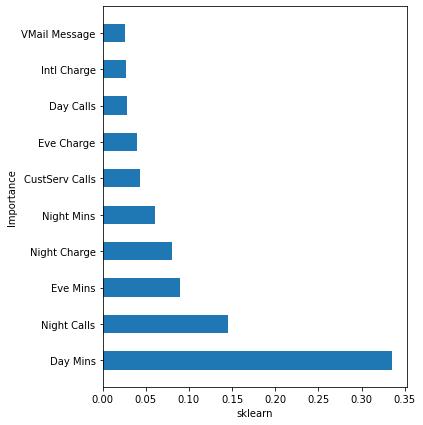

In [152]:
def plot_importance(importance, ax, x_label, columns):
    temp1 = [columns[i] for i in range(len(importance))]
    temp2 = importance
    result = sorted(zip(temp1, temp2), key=lambda x:x[1], reverse = True)
    label = [x[0] for x in result][:10]
    print(label)
    value = [x[1] for x in result][:10]
    print(value)
    ax.barh(label, value, height=0.5)
    ax.set_xlabel(x_label)
    ax.set_ylabel('Importance')
 
# fig, axs = plt.subplots(1, 2)
fig = plt.figure()
fig.set_facecolor('white')
fig.set_figwidth(12)
fig.set_figheight(7)
 
ax1 = plt.subplot(1, 2, 1)
# ax2 = plt.subplot(1, 2, 2)
plot_importance(dt.feature_importances_, ax1, 'sklearn', X_final.keys())
plt.show()

### 랜덤포레스트회귀

* A meta estimator 
* Fits a number of classifying decision trees 
* on various sub-samples of the dataset 
* Uses averaging to improve the predictive accuracy 
* and control over-fitting.
* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [149]:
### RandomForestRegressor() ###
forest = RandomForestRegressor(n_estimators = 10,
                              criterion = 'squared_error',
                              random_state = 1,
                              n_jobs = -1)

forest = forest.fit(X_train, y_train.values.ravel())

y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

In [150]:
### 모델 성능 측정 ###
#4. 모델 성능 측정
print('forest train score %.3f, forest test score: %.3f' % (
forest.score(X_train,y_train),
forest.score(X_test,y_test)))

forest train score 0.950, forest test score: 0.719


['Night Charge', 'Day Mins', 'Night Calls', 'Eve Mins', 'Night Mins', 'CustServ Calls', 'Eve Charge', 'Day Charge', 'Day Calls', 'Intl Charge']
[0.21784108709459715, 0.21394395329493046, 0.1286273300986608, 0.08704581313026587, 0.058359727350627555, 0.04372919105508912, 0.03617101790283033, 0.03495794617335159, 0.0305157999699098, 0.027813647907045463]


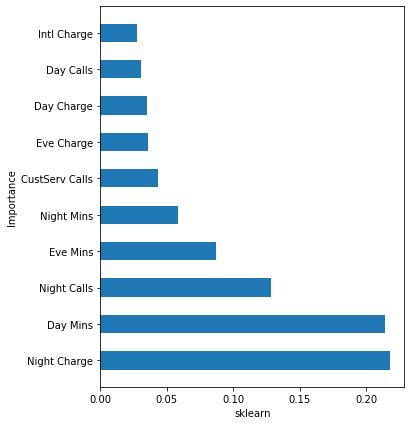

In [154]:
# fig, axs = plt.subplots(1, 2)
fig = plt.figure()
fig.set_facecolor('white')
fig.set_figwidth(12)
fig.set_figheight(7)
 
ax1 = plt.subplot(1, 2, 1)
plot_importance(forest.feature_importances_, ax1, 'sklearn', X_final.keys())
plt.show()

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/loc

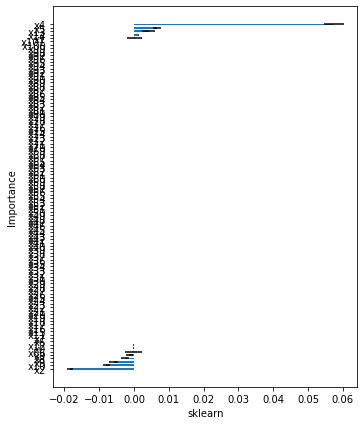

In [145]:
from sklearn.inspection import permutation_importance
def plot_importance(importance, importance_std, ax, x_label):
    temp1 = [f'x{i}' for i in range(len(importance))]
    temp2 = importance
    temp3 = importance_std
    result = sorted(zip(temp1, temp2, temp3), key=lambda x:x[1])
    label = [x[0] for x in result]
    value = [x[1] for x in result]
    value_2 = [x[2] for x in result]
    ax.barh(label, value, xerr=value_2, height=0.5)
    ax.set_xlabel(x_label)
    ax.set_ylabel('Importance')

r = permutation_importance(forest, X_final, y_final,
                           n_repeats=30,
                           random_state=0)
fig = plt.figure()
fig.set_facecolor('white')
fig.set_figwidth(12)
fig.set_figheight(7)
 
ax1 = plt.subplot(1, 2, 1)
plot_importance(r.importances_mean, r.importances_std, ax1, 'sklearn')
plt.show()

### 분석 코드 제출 방식
* 분석 결과 코드는 .ipynb 파일로 저장한 뒤
* 금일 14시까지 naebon1@gmail.com으로 전송해 주세요.